# Prediction of Essential Tremor Using resting fMRI connectivity measures

#INTRODUCTION

Essential Tremor (ET) is one of the most prevalent chronic neurological disorders, mainly observed in adults. It is characterised by a tremor in limbs, head, trunk, voice and tongue. Most commonly, kinetic tremor of the upper limbs is observed in ET patients. In 2020, the global prevalence of ET in the general population was 0.32% (ranging from 0.04% in people <20 years to 2.87% in people > 80 years and above). The total number of people suffering from ET worldwide was 24.91 million in 2020, was reported in a systematic review article by Peige and colleagues (Song et al., 2021).
Several studies reported ET as a monosymptomatic disease with motor (such as dystonia, cerebellar signs, and disturbances of gait, speech and balance) and non-motor symptoms (such as anxiety, depression, cognitive impairment, and apathy). The International Parkinson and Movement Disorder Society has declared ET as a heterogeneous disorder according to the 2018 consensus statement on tremor disorders. (Bhatia KP et al., 2018; Louis ED, 2018)
In the past few decades, advances in neuroimaging modalities have provided valuable insights into the pathophysiology of ET. Neuronal degeneration in the cerebellum and functional connectivity loss in the cerebello-thalamo-cortical tracts has been found in ET patients (Bhalsing KS et al., 2013; Lenka et al., 2017). Additionally, the abnormalities in the ET brain were found due to an altered Purkinje cell population (Louis ED et al., 2019).

#AIM OF THE PROJECT

Though ET is considered a benign neurological disorder but a wide range of symptoms and comorbidities could be seen as ET progresses, leading to disability, impaired quality of life and social handicap. With the advancement of ET, patients face problems carrying out their daily activities and often rely on others' help. There are an increasing number of cases each year worldwide, making it very important to diagnose at an early stage. Therefore, this project aims to create a model that will effectively diagnose ET in its early stage, which will be helpful from a public health perspective.

 

#INFORMATION OF DATASET

The clean fMRI time series data have been taken from below paper 2 (Bharath et al., 2022) by directlly contacting the authors #The features were selected based on authors publication. Those feature were computed from the clean BOLD fMRI time series using available codes from github.

We have taken 30 patient with essential tremor (ET) data (mean (age ± SD 37.33) ± 10.67 years, 6
Females, all righthanded participants) and age gender matched 30 healthy control (HC, mean (age ± SD) 38.2 ± 10.7
years, 4 Females, all righthanded participants). We took the clean resting fMRI time series that was extracted using Shen 2015 atlas for cortical, subcortical and cerebellum areas. The fMRI data were recorded in 3T MRI scanner (Skyra; Siemens, Erlangen,
Germany) at NIMHANS, Bengaluru, India). This clean resting fMRI time series was used to extract different static and dynamic connectivity features based on author papers (Bharath et al., 2022). The Features are mean FC connectivity, mean DFC connectivity, network integration, network segregation, whole brain syncronisation, metastability, ignition. 

Papers:

#1. Bharath, Rose Dawn, et al. "Single session of rTMS enhances brain metastability and intrinsic ignition." bioRxiv (2022): 2022-08.

#2. Lenka, Abhishek, et al. "Role of altered cerebello-thalamo-cortical network in the neurobiology of essential tremor." #Neuroradiology 59 (2017): 157-168.

#Github: https://github.com/RajanikantPanda/rTMS_ET_Brain_Metastability_Ignition #The features were extracted using matlab as their code was available only in matlab.



# To classify Healthy Control (HC) and Essential Tremor (ET) Patients using resting state fMRI static and dynamic connectivity features 


In [14]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
%matplotlib inline
import math
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr   

In [15]:
#Import the clean BOLD fMRI timeseries data for both control (i.e., ts_tmp_hc) and ET patients (i.e., ts_tmp_pt)
ts_tmp_hc = sio.loadmat('Data_BOLD_timeseries_HC_ET')['HC']
ts_tmp_pt = sio.loadmat('Data_BOLD_timeseries_HC_ET')['ET']
print(ts_tmp_hc.shape)
print(ts_tmp_pt.shape)
TR=2
# n_sub= number of subjects 
# N= number of ROIs (brain regions; in our case 268 ROIs extracted using Shen-2015 atlas)
# T=number of time points/dynamics (in TR = 2sec) of the fMRI/BOLD data
n_sub_hc, N_hc,T_hc = np.shape(ts_tmp_hc)
n_sub_pt, N_pt,T_pt = np.shape(ts_tmp_pt)

(30, 268, 245)
(30, 268, 245)


# Display fMRI BOLD timeseries data for both control and ET
First plot the raw images for one healthy subjects and one ET patient to view how BOLD time series look:

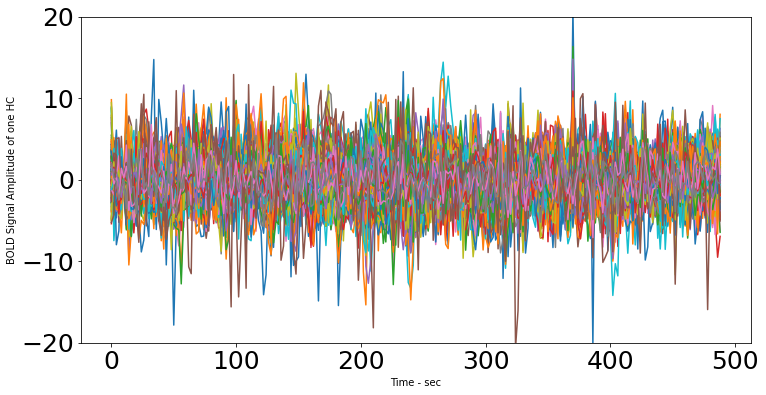

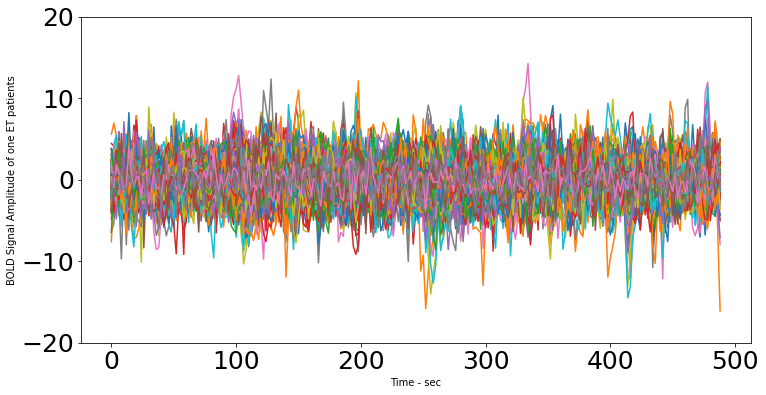

In [16]:
    #Analyze bold data - Visualize clean bold time series 
    
    #Show one HC subject bold time series
    plt.figure(figsize=(12,6))
    x = np.arange(0,TR*np.shape(ts_tmp_hc)[2],TR) # define x-axis unit
    plt.plot(x,ts_tmp_hc[1,:,:].T) # to view other subject signal, change 1st dimension number
    plt.axis(ymin=-20, ymax=20)
    plt.xlabel('Time - sec')
    plt.ylabel('BOLD Signal Amplitude of one HC')
    plt.show()
    
    #Show one ET patients bold time series
    plt.figure(figsize=(12,6))
    x = np.arange(0,TR*np.shape(ts_tmp_hc)[2],TR) # define x-axis unit
    plt.plot(x,ts_tmp_pt[1,:,:].T) # to view other subject signal, change 1st dimension number
    plt.axis(ymin=-20, ymax=20)
    plt.xlabel('Time - sec')
    plt.ylabel('BOLD Signal Amplitude of one ET patients')
    plt.show()

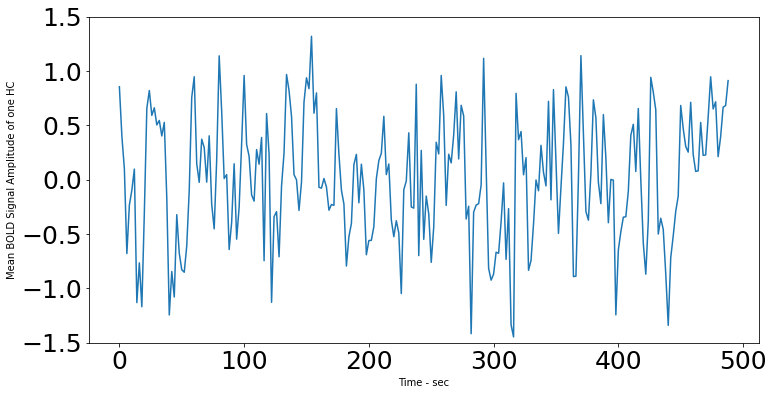

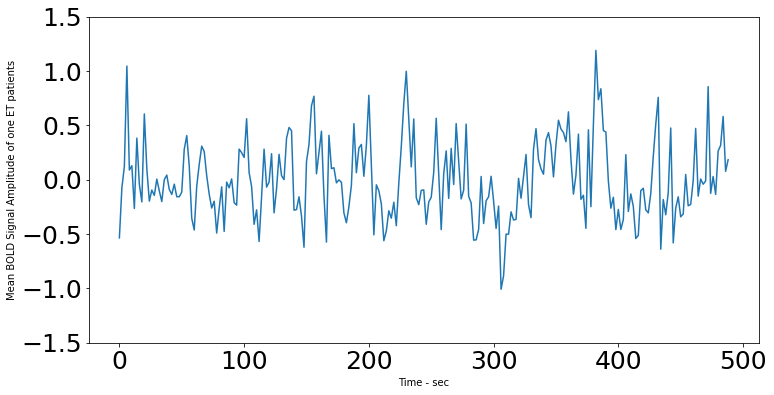

In [17]:
    #Analyze bold data - Visualize averaged bold time series
    
    #Show average bold timeseries of one HC 
    ts_tmp_hc_mean_sig = np.mean(ts_tmp_hc,axis=1) # average all ROIs signal (2nd dimension)
    plt.figure(figsize=(12,6))
    x = np.arange(0,TR*np.shape(ts_tmp_hc)[2],TR) # define x-axis unit
    plt.plot(x,ts_tmp_hc_mean_sig[1,:]) # show one subject averaged signal (to view other subject change 1st dimension number)
    plt.axis(ymin=-1.5, ymax=1.5)
    plt.xlabel('Time - sec')
    plt.ylabel('Mean BOLD Signal Amplitude of one HC')
    plt.show()
    
    #Show average bold timeseries of one ET patient
    ts_tmp_hc_mean_sig = np.mean(ts_tmp_pt,axis=1) # average all ROIs signal (2nd dimension)
    plt.figure(figsize=(12,6))
    x = np.arange(0,TR*np.shape(ts_tmp_pt)[2],TR) # define x-axis unit
    plt.plot(x,ts_tmp_hc_mean_sig[1,:]) # show one subject averaged signal (to view another subject change 1st dimension number)
    plt.axis(ymin=-1.5, ymax=1.5)
    plt.xlabel('Time - sec')
    plt.ylabel('Mean BOLD Signal Amplitude of one ET patients')
    plt.show()
    

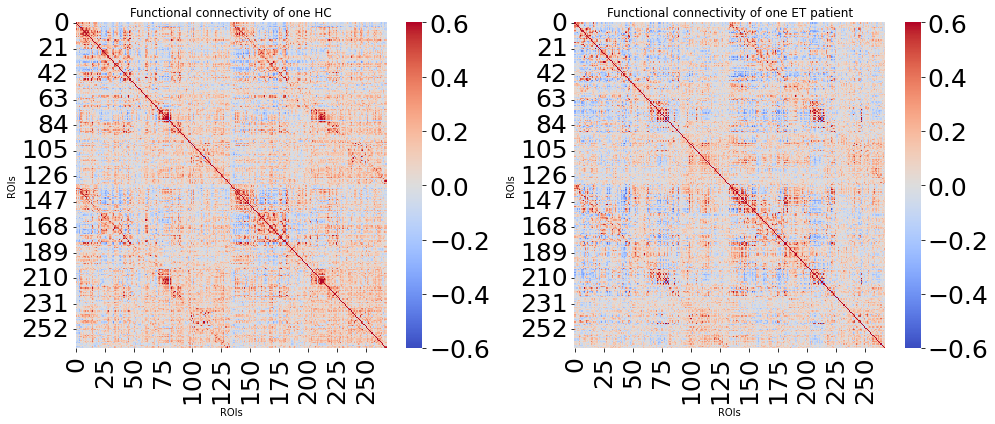

In [18]:
    #Analyze bold data - Visualize functional connectivity of one HC and one patient data
    
    # Create FC and visualise it for HC
    fc = np.corrcoef(ts_tmp_hc[1,:,:]) #to view other subject connectivity, change 1st dimension number
    np.shape(fc)
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.heatmap(fc, vmin=-0.6, vmax=0.6, cmap="coolwarm")
    #sns.color_palette("Spectral", as_cmap=True)
    plt.xlabel('ROIs')
    plt.ylabel('ROIs')
    plt.title('Functional connectivity of one HC')
    
    # Create FC and visualise it for ET
    fc = np.corrcoef(ts_tmp_pt[1,:,:]) #to view other subject connectivity, change 1st dimension number
    np.shape(fc)
    plt.subplot(1,2,2)
    sns.heatmap(fc, vmin=-0.6, vmax=0.6, cmap="coolwarm") 
    plt.xlabel('ROIs')
    plt.ylabel('ROIs')
    plt.title('Functional connectivity of one ET patient')
    plt.tight_layout()
    plt.show()

# IMPORT BRAIN DYNMIC FEATURES (i.e., mean FC connectivity, mean DFC connectivity, network integration, network segregation, whole brain syncronisation, metastability, ignition)

#The Features are mean FC connectivity, mean DFC connectivity, network integration, network segregation, whole brain syncronisation, metastability, ignition
#The clean fMRI time series data have been taken from below paper 2 (Bharath et al., 2022) by directlly contacting to the authors
#The features were selected based on authors publication. Those feature were computed from the clean BOLD fMRI time series using there available codes from github.

Papers:

#1. Bharath, Rose Dawn, et al. "Single session of rTMS enhances brain metastability and intrinsic ignition." bioRxiv (2022): 2022-08.

#2. Lenka, Abhishek, et al. "Role of altered cerebello-thalamo-cortical network in the neurobiology of essential tremor." #Neuroradiology 59 (2017): 157-168. 

#Github: https://github.com/RajanikantPanda/rTMS_ET_Brain_Metastability_Ignition #The features were extracted using matlab as their code was available only in matlab.

In [19]:
# Import all features for both HC and ET patients
dFC_hc = sio.loadmat('DFC_Features_Result')['HC_dFC_all']
dFC_pt = sio.loadmat('DFC_Features_Result')['ET_dFC_all']
print(dFC_hc.shape)
print(dFC_pt.shape)
dFC_hc_group_mean = np.mean(dFC_hc,axis=0)
dFC_pt_group_mean = np.mean(dFC_pt,axis=0)
# Feature 1: mean dFC connectivity  of HC and ET
dFC_hc_wb_mean = sio.loadmat('DFC_Features_Result')['HC_dFC_all_wb']
dFC_pt_wb_mean = sio.loadmat('DFC_Features_Result')['ET_dFC_all_wb']
# Feature 2: whole brain network integration of HC and ET
Int_hc = sio.loadmat('DFC_Features_Result')['HC_wb_int']
Int_pt = sio.loadmat('DFC_Features_Result')['ET_wb_int']
# Feature 3: whole brain network segregation of HC and ET
Seg_hc = sio.loadmat('DFC_Features_Result')['HC_wb_seg']
Seg_pt = sio.loadmat('DFC_Features_Result')['ET_wb_seg']
# Feature 4: whole brain syncronisation of HC and ET
Sync_hc = sio.loadmat('DFC_Features_Result')['HC_sync_mean']
Sync_pt = sio.loadmat('DFC_Features_Result')['ET_sync_mean']
# Feature 5: Metastability of HC and ET
Meta_hc = sio.loadmat('DFC_Features_Result')['HC_meta']
Meta_pt = sio.loadmat('DFC_Features_Result')['ET_meta']
# Feature 6: Whole Brain Ignition of HC and ET
Ignition_hc = sio.loadmat('DFC_Features_Result')['HC_ignition']
Ignition_pt = sio.loadmat('DFC_Features_Result')['ET_ignition']
# All six features of HC subjects
HC_Features = np.concatenate([dFC_hc_wb_mean, Int_hc, Seg_hc, Sync_hc, Meta_hc.T, Ignition_hc.T], axis = 1) 
print(HC_Features.shape)
# All six features of ET patients
ET_Features = np.concatenate([dFC_pt_wb_mean, Int_pt, Seg_pt, Sync_pt, Meta_hc.T, Ignition_pt.T], axis = 1) 
print(ET_Features.shape)

(30, 268, 268)
(30, 268, 268)
(30, 6)
(30, 6)


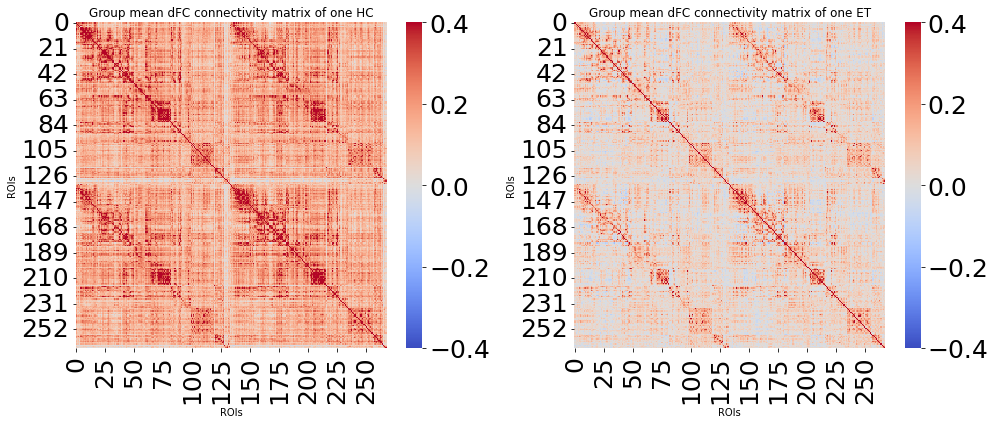

In [20]:
    # Display Features
    # Plot Group mean dFC connectivity matrix of HC and ET
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.heatmap(dFC_hc_group_mean, vmin=-0.4, vmax=0.4, cmap="coolwarm")
    plt.xlabel('ROIs')
    plt.ylabel('ROIs')
    plt.title('Group mean dFC connectivity matrix of one HC')

    plt.subplot(1,2,2)
    sns.heatmap(dFC_pt_group_mean, vmin=-0.4, vmax=0.4, cmap="coolwarm") 
    plt.xlabel('ROIs')
    plt.ylabel('ROIs')
    plt.title('Group mean dFC connectivity matrix of one ET')
    plt.tight_layout()
    plt.show()

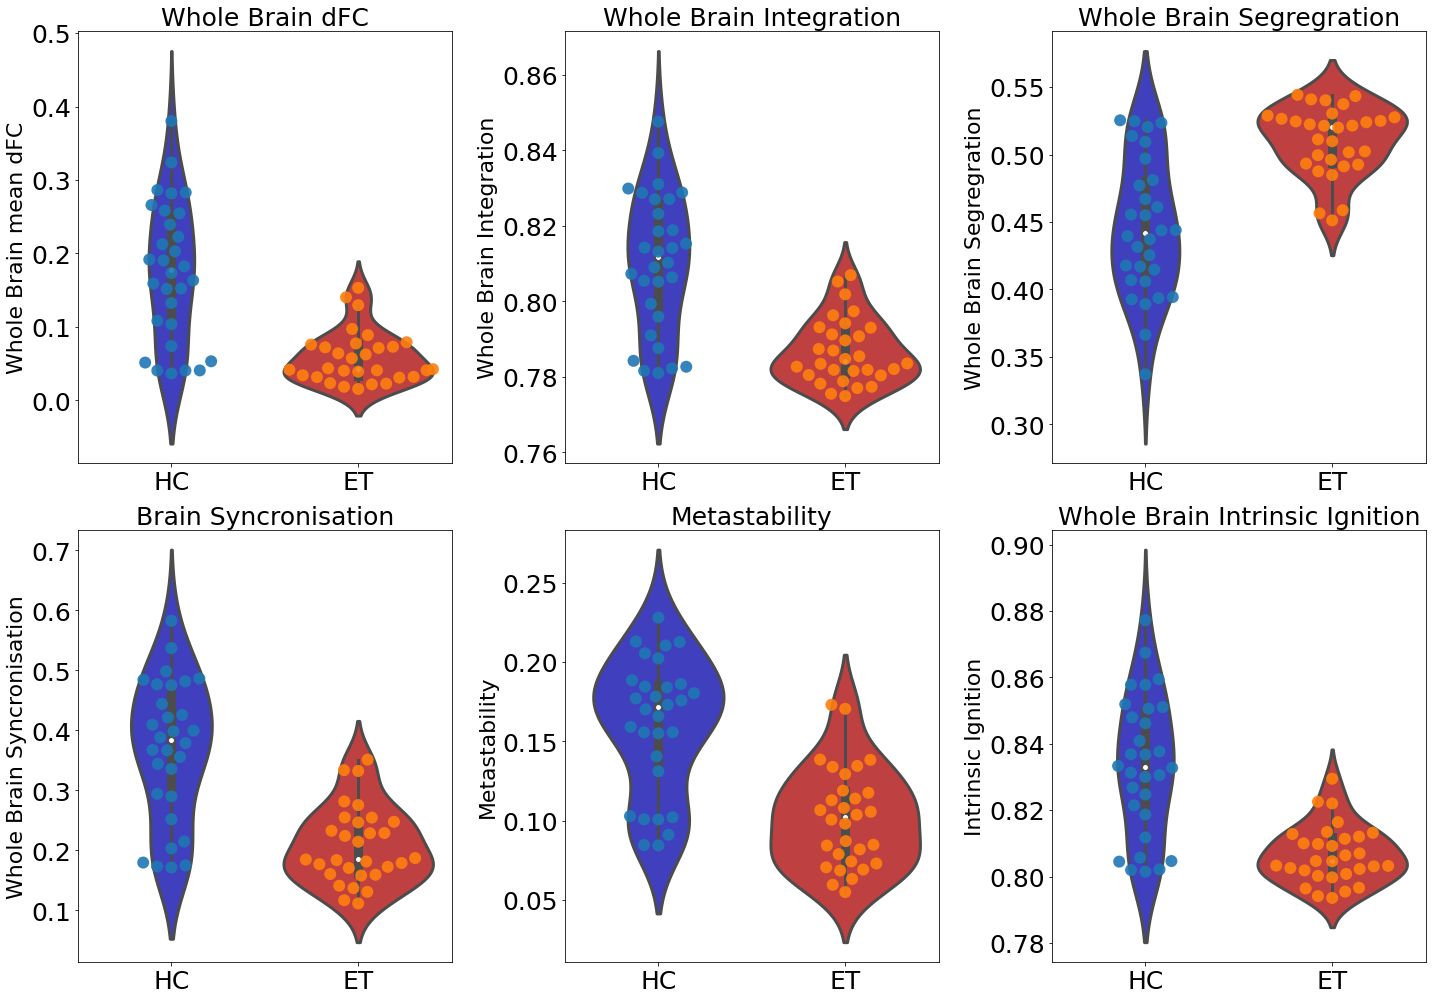

In [23]:
    # Display All the Six Features 
    
    # Plot whole brain dFC of HC and ET in a violin plot
    dFC_wb_mean_df = pd.DataFrame({'HC': np.squeeze(dFC_hc_wb_mean), 'ET': np.squeeze(dFC_pt_wb_mean)})
    plt.figure(figsize=(20,14))
    plt.subplot(2,3,1)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=dFC_wb_mean_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=dFC_wb_mean_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Whole Brain mean dFC', fontsize=22)
    plt.title('Whole Brain dFC', fontsize=25)  

    #  Plot whole brain integration of HC and ET in a violin plot
    Int_df = pd.DataFrame({'HC': np.squeeze(Int_hc), 'ET': np.squeeze(Int_pt)})
    plt.subplot(2,3,2)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Int_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Int_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Whole Brain Integration', fontsize=22)
    plt.title('Whole Brain Integration', fontsize=25) 
    
    # Plot whole brain segregataion of HC and ET in a violin plot
    Seg_df = pd.DataFrame({'HC': np.squeeze(Seg_hc), 'ET': np.squeeze(Seg_pt)})
    plt.subplot(2,3,3)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Seg_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Seg_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Whole Brain Segregration', fontsize=22)
    plt.title('Whole Brain Segregration', fontsize=25)
    
    # Plot whole brain syncronisation of HC and ET in a violin plot
    Sync_df = pd.DataFrame({'HC': np.squeeze(Sync_hc), 'ET': np.squeeze(Sync_pt)})
    plt.subplot(2,3,4)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Sync_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Sync_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Whole Brain Syncronisation', fontsize=22)
    plt.title('Brain Syncronisation', fontsize=25)  

    # Plot Metastability of HC and ET in a violin plot
    Meta_df = pd.DataFrame({'HC': np.squeeze(Meta_hc), 'ET': np.squeeze(Meta_pt)})
    plt.subplot(2,3,5)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Meta_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Meta_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Metastability', fontsize=22)
    plt.title('Metastability', fontsize=25)  

    # Plot Ignition of HC and ET in a violin plot
    Ignition_df = pd.DataFrame({'HC': np.squeeze(Ignition_hc), 'ET': np.squeeze(Ignition_pt)})
    plt.subplot(2,3,6)
    my_palette = {'HC':'b', 'ET':'r'}
    ax = sns.violinplot(data=Ignition_df, palette=my_palette, linewidth=3, saturation = 0.5)
    ax = sns.swarmplot(data=Ignition_df, edgecolor="gray", size=12, alpha=0.9)
    plt.rc('xtick', labelsize=25); plt.rc('ytick', labelsize=25)
    plt.ylabel('Intrinsic Ignition', fontsize=22)
    plt.title('Whole Brain Intrinsic Ignition', fontsize=25)  
    
    plt.tight_layout()
    plt.show()

# Classification Building and Validation

#Build the classifier using two classification approach. One is using Linear Support Vector Machiene (SVM) and anoth is using random forest by taking above observation/features of healthy subjects and ET patients

In [25]:
# The healthy subject data (Subjects x Features) are there in 'HC_Features' veriable and 
# ET patients data (Subjects x Features) are there in 'ET_Features' veriable
np.shape(HC_Features)
X = np.concatenate([HC_Features, ET_Features], axis = 0) 
y = np.squeeze(sio.loadmat('DFC_Features_Result')['Grp'])

np.shape(y)

(60,)

In [29]:
# Import Machinelerning libraries from sklearn to use for linear SVM
from sklearn.preprocessing import StandardScaler     # Standardize features to remove the mean and scaling to unit variance
from sklearn.model_selection import train_test_split #Used to divide the dataset into a training set and a validation set 
from sklearn.model_selection import GridSearchCV # A library from Scikit-learn used to perform a cross-validation as well as to perform hyperparameter tuning to determine the best value for a model
from sklearn.svm import LinearSVC # Used to perform a support vector machine classification
from sklearn.model_selection import cross_val_score # Used to perform a SVM k-fold cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Sourse for the code: https://www.datatechnotes.com/2020/07/classification-example-with-linearsvm-in-python.html
# Sourse for the code: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

# Build the Linear SVM 
StandardScaler().fit(X,y)
lsvc = LinearSVC(random_state=0,multi_class='ovr')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
lsvc.fit(X_train, y_train)

# Test the SVM classifier acuresy from train data
score = lsvc.score(X_train, y_train)
print("--- TRAIN DATA RESULTS ---")
print("Accuracy of SVM: ", score)

--- TRAIN DATA RESULTS ---
Accuracy of SVM:  0.7857142857142857


In [30]:
# Test the SVM classifier acuresy by test data

print("--- TEST DATA SVM RESULTS ---")

y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr)

--- TEST DATA SVM RESULTS ---
[[8 2]
 [0 8]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.80      1.00      0.89         8

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



In [35]:
## Used the SVM k-fold cross validation (k=10 fold in our case)

cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("SVM 10-fold cross validation average accuracy score: %.2f" % cv_scores.mean())

SVM 10-fold cross validation average accuracy score: 0.79


# Random Forest Classification model

In [37]:
# Import Machinelerning libraries from sklearn to use for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Sourse code: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

print("----Random Forest Classification----")
param_grid = {'n_estimators':[10,20,30,40,50,60,70,80,100], 'max_depth':[10, 20]}
print (param_grid)
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("Accuracy of Random Forest:", (grid_search.score(X_test, y_test))*100)

----Random Forest Classification----
{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 100], 'max_depth': [10, 20]}
Accuracy of Random Forest: 83.33333333333334


# DISCUSSION

Advancement in Machine Learning (ML) has provided oppurtunities to improve various fields including Healthcare.

In this project we used various static and dynamic functional connectivity measures (i.e., mean DFC connectivity, network integration, network segregation, whole brain syncronisation, metastability, ignition) to develope a ML model to predict patients with ET. We mainly used two classifiers, that is linner SVM, SVM k-fold cross validation and Random Forest Classification. We found all the clasifier show more than 78% accuracy and Random Forest shows highest classification (i.e., accuracy = 83.3%) among them. 

We conclude the classifier model is predict well the ET patients from control, which could be potential to use in a clinical setup. Further study with large sample and taking other movement disorder patients such as Parnkinson´s could improve the useability of the model. 